<a href="https://colab.research.google.com/github/sayid-alt/usd_idr_exchange_prediction/blob/main/development/usd_idr_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import urllib
import zipfile
import yfinance as yf
import os

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Utilities

In [2]:
# Fetch dataset
def fetch_dataset(url='https://github.com/sayid-alt/usd_idr_exchange_prediction/raw/main/datasets/IDR_USD_Historical_Data.zip',
                  save_path='datasets/usdidr.zip'):
  '''
    default dataset to be downloaded was idr/usd historical
  '''
  os.makedirs("datasets", exist_ok=True)
  print(f'Success make dir datasets')

  urllib.request.urlretrieve(url, save_path)
  print(f"\nDownload {url} Success to {save_path}")

  with zipfile.ZipFile(save_path, "r") as zip_ref:
    zip_ref.extractall("datasets")
  print(f'\nExtract {save_path} Success to datasets')

# load dataset
def load_usd_idr_dataset(save_path='datasets/IDR_USD_Historical_Data.csv'):
  df = pd.read_csv(save_path, delimiter=',') # Added delimiter and error handling for bad lines
  df["Date"] = pd.to_datetime(df["Date"])
  df.set_index("Date", inplace=True)
  return df

# Plot series
def plot_series(df, columns, colors=['blue', 'red', 'green', 'yellow']):
  """Plots multiple series from a Pandas DataFrame with different colors.

  Args:
    df: Pandas DataFrame containing the time series data.
    columns: A list of column names to plot.
    colors: A list of colors to use for each series.
  """
  fig, ax = plt.subplots(figsize=(15, 6))

  for i, column in enumerate(columns):
    ax.plot(df.index, df[column], color=colors[i % len(colors)], label=column)

  ax.set_xlabel("Time")
  ax.set_ylabel("Price")
  ax.legend()
  plt.show()

# Generate Data

## Extract data (***For not to repeat the process be carefull to run the code below***)

---






This process of extracting data from yahoo finance using yfinance python library. The extacted dataset has been saved to the github account for fixed date range of dataset.
<br><br>
The Downloaded dataset then pushed into the github account for access it as public. <br> To access the dataset on github repository please visit this <a href="https://github.com/sayid-alt/usd_idr_exchange_prediction/tree/main/datasets">link<a/>.

In [3]:
idrx = yf.Ticker("IDR=X")
idrx.info

{'maxAge': 86400,
 'priceHint': 4,
 'previousClose': 15194.0,
 'open': 15200.0,
 'dayLow': 15179.0,
 'dayHigh': 15279.0,
 'regularMarketPreviousClose': 15194.0,
 'regularMarketOpen': 15200.0,
 'regularMarketDayLow': 15179.0,
 'regularMarketDayHigh': 15279.0,
 'bid': 15259.0,
 'ask': 15269.0,
 'fiftyTwoWeekLow': 14379.8,
 'fiftyTwoWeekHigh': 16510.2,
 'fiftyDayAverage': 15638.962,
 'twoHundredDayAverage': 15859.472,
 'currency': 'IDR',
 'exchange': 'CCY',
 'quoteType': 'CURRENCY',
 'symbol': 'IDR=X',
 'underlyingSymbol': 'IDR=X',
 'shortName': 'USD/IDR',
 'longName': 'USD/IDR',
 'firstTradeDateEpochUtc': 993682800,
 'timeZoneFullName': 'Europe/London',
 'timeZoneShortName': 'BST',
 'uuid': 'af5a8623-ae2e-3352-96c8-72c36440574c',
 'messageBoardId': 'finmb_IDR_X',
 'gmtOffSetMilliseconds': 3600000,
 'trailingPegRatio': None}

In [4]:
idrx_history = idrx.history(period="5y") # period 5 years from the running code, it might changes overtime
idrx_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-02 00:00:00+01:00,14265.099609,14265.099609,14179.900391,14206.000000,0,0.0,0.0
2019-10-03 00:00:00+01:00,14247.700195,14247.700195,14135.400391,14188.000000,0,0.0,0.0
2019-10-04 00:00:00+01:00,14195.000000,14195.000000,14112.000000,14166.000000,0,0.0,0.0
2019-10-07 00:00:00+01:00,14128.000000,14181.500000,14128.000000,14128.000000,0,0.0,0.0
2019-10-08 00:00:00+01:00,14237.000000,14237.000000,14128.000000,14239.500000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-26 00:00:00+01:00,15201.500000,15204.000000,14975.700195,15201.500000,0,0.0,0.0
2024-09-27 00:00:00+01:00,15070.000000,15161.700195,15019.299805,15070.000000,0,0.0,0.0
2024-09-30 00:00:00+01:00,15118.000000,15197.299805,14935.900391,15118.000000,0,0.0,0.0


In [5]:
idrx_history.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                        
---  ------        --------------  -----                        
 0   Date          1306 non-null   datetime64[ns, Europe/London]
 1   Open          1306 non-null   float64                      
 2   High          1306 non-null   float64                      
 3   Low           1306 non-null   float64                      
 4   Close         1306 non-null   float64                      
 5   Volume        1306 non-null   int64                        
 6   Dividends     1306 non-null   float64                      
 7   Stock Splits  1306 non-null   float64                      
dtypes: datetime64[ns, Europe/London](1), float64(6), int64(1)
memory usage: 81.8 KB


# Save loaded dataset to csv file

In [6]:
# idrx_history.to_csv("IDR_USD_Historical_Data.csv")

In [7]:
# #download the prepared dataset from colab
# from google.colab import files
# files.download('IDR_USD_Historical_Data.csv')


## Load Data (***For not to repeat the process be carefull to run the code above***)

The has been downloaded and stored on github. It has been preserved on the link above for access to github

### Download Dataset

In [8]:
fetch_dataset()

Success make dir datasets

Download https://github.com/sayid-alt/usd_idr_exchange_prediction/raw/main/datasets/IDR_USD_Historical_Data.zip Success to datasets/usdidr.zip

Extract datasets/usdidr.zip Success to datasets


### Load Dataset

In [9]:
idrx_df = load_usd_idr_dataset()
idrx_df

<ipython-input-2-e96c4dc35776>:20: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Date"] = pd.to_datetime(df["Date"])


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-02 00:00:00+01:00,14265.099609,14265.099609,14179.900391,14206.000000,0,0.0,0.0
2019-10-03 00:00:00+01:00,14247.700195,14247.700195,14135.400391,14188.000000,0,0.0,0.0
2019-10-04 00:00:00+01:00,14195.000000,14195.000000,14112.000000,14166.000000,0,0.0,0.0
2019-10-07 00:00:00+01:00,14128.000000,14181.500000,14128.000000,14128.000000,0,0.0,0.0
2019-10-08 00:00:00+01:00,14237.000000,14237.000000,14128.000000,14239.500000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-26 00:00:00+01:00,15201.500000,15204.000000,14975.700195,15201.500000,0,0.0,0.0
2024-09-27 00:00:00+01:00,15070.000000,15161.700195,15019.299805,15070.000000,0,0.0,0.0
2024-09-30 00:00:00+01:00,15118.000000,15197.299805,14935.900391,15118.000000,0,0.0,0.0


In [10]:
idrx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 2019-10-02 00:00:00+01:00 to 2024-10-02 00:00:00+01:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1306 non-null   float64
 1   High          1306 non-null   float64
 2   Low           1306 non-null   float64
 3   Close         1306 non-null   float64
 4   Volume        1306 non-null   int64  
 5   Dividends     1306 non-null   float64
 6   Stock Splits  1306 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 81.6+ KB


In [11]:
for col in idrx_df.columns:
  print(f'{col}: {idrx_df[col].unique().sum()}')

Open: 17275890.73046875
High: 18500926.828125
Low: 18527013.466796875
Close: 17730960.278320312
Volume: 0
Dividends: 0.0
Stock Splits: 0.0


`Volume`, `Dividends`, `Stock Splits` does not give much information, so we'll drop it

In [12]:
idrx_df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
idrx_df

,Open,High,Low,Close
Date,,,,
2019-10-02 00:00:00+01:00,14265.099609,14265.099609,14179.900391,14206.000000
2019-10-03 00:00:00+01:00,14247.700195,14247.700195,14135.400391,14188.000000
2019-10-04 00:00:00+01:00,14195.000000,14195.000000,14112.000000,14166.000000
2019-10-07 00:00:00+01:00,14128.000000,14181.500000,14128.000000,14128.000000
2019-10-08 00:00:00+01:00,14237.000000,14237.000000,14128.000000,14239.500000
...,...,...,...,...
2024-09-26 00:00:00+01:00,15201.500000,15204.000000,14975.700195,15201.500000
2024-09-27 00:00:00+01:00,15070.000000,15161.700195,15019.299805,15070.000000
2024-09-30 00:00:00+01:00,15118.000000,15197.299805,14935.900391,15118.000000


Much better! :)

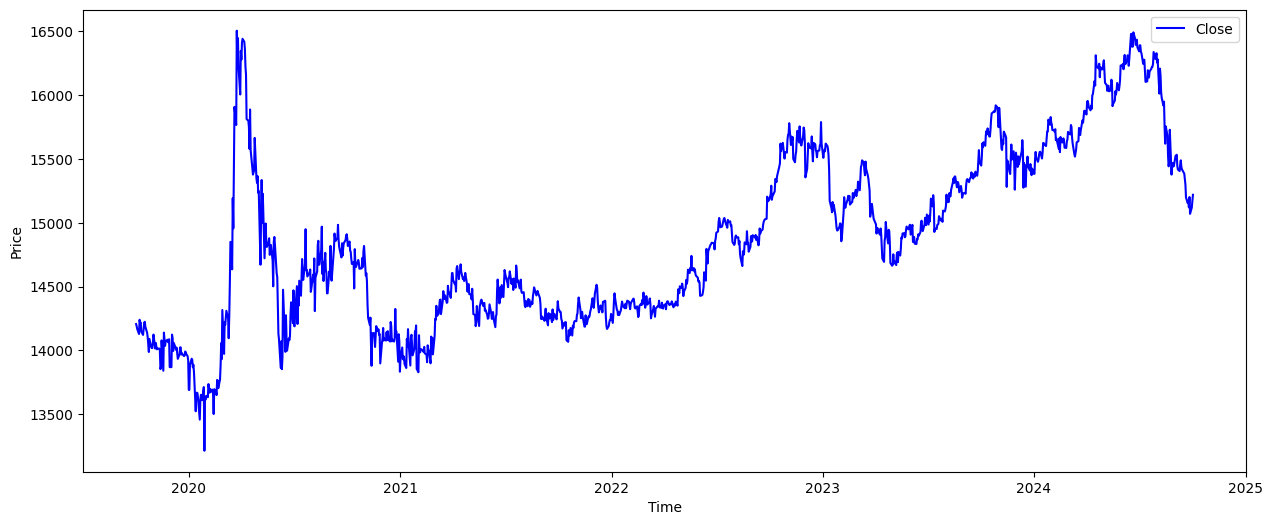

In [13]:
plot_series(idrx_df, ['Close'])

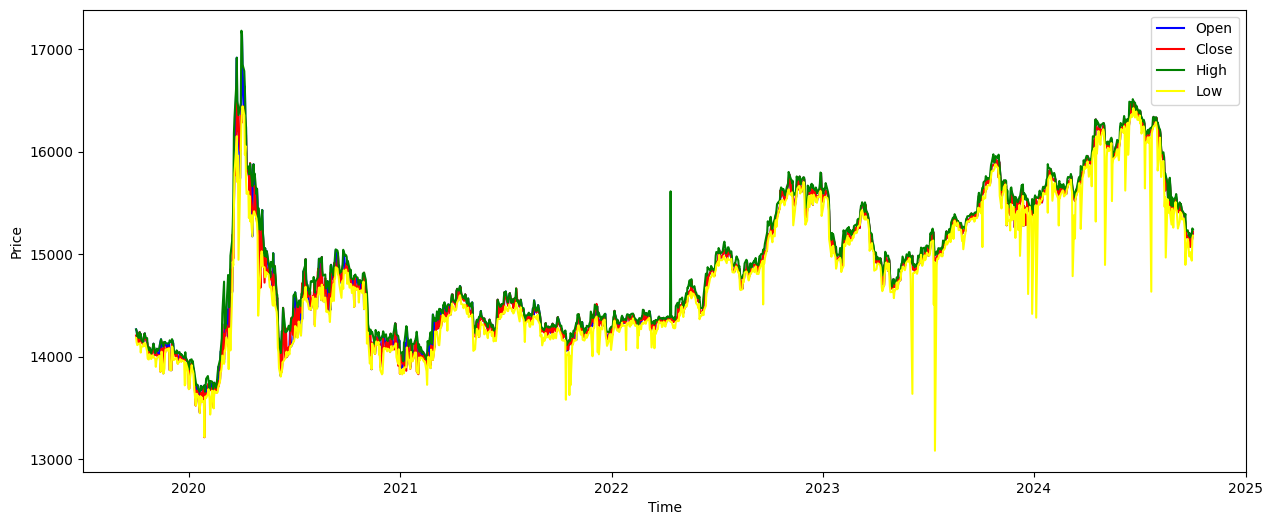

In [14]:
plot_series(idrx_df, ['Open', 'Close', 'High', 'Low'])

# Preprocessing

## Check for missing value

In [15]:
idrx_df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0


## Check stationary (unit root test)
To determine whether a time series has a unit root (and is thus non-stationary), we typically use tests like the Augmented Dickey-Fuller (ADF) test

In [16]:
from statsmodels.tsa.stattools import adfuller

def check_stationary(df, columns):

  for num, column in enumerate(columns):

    # Just print the line if checking more than one columns
    if len(columns) > 1 & num > 0:
      print('\n'.ljust(50, '-'))

    # Title for columns that checked
    print(f'{num+1}). ADF For column {column}:')

    # results that contained from adfuller
    results = adfuller(df[column])

    print(f'ADF_statistic: {results[0]}')
    print(f'p-value: {results[1]}')
    print(f'Number of lags used: {results[2]}')

    print(f'Critical Values:')
    for key, value in results[4].items():
      print(f'{key}: {value}')

    if results[1] <= 0.05: # p-value <= 0.05
      print(f"\n\033[32mThe series is stationary!\033[0m")
    else:
      print(f'\n\033[31mThe series is not stationary!\033[0m')



In [17]:
check_stationary(df=idrx_df, columns=idrx_df.columns)

1). ADF For column Open:
ADF_statistic: -2.5664444941812286
p-value: 0.10013270324356704
Number of lags used: 19
Critical Values:
1%: -3.4354451795550935
5%: -2.863790090661305
10%: -2.567967966012737

The series is not stationary!

-------------------------------------------------
2). ADF For column High:
ADF_statistic: -2.841215605907118
p-value: 0.052623314153096755
Number of lags used: 11
Critical Values:
1%: -3.4354136163971782
5%: -2.8637761637845895
10%: -2.5679605492954045

The series is not stationary!
3). ADF For column Low:
ADF_statistic: -2.408063999374663
p-value: 0.1394733280837791
Number of lags used: 10
Critical Values:
1%: -3.4354096984769003
5%: -2.863774435037593
10%: -2.567959628657891

The series is not stationary!

-------------------------------------------------
4). ADF For column Close:
ADF_statistic: -2.74271571099479
p-value: 0.06693373761678824
Number of lags used: 16
Critical Values:
1%: -3.435433297366533
5%: -2.863784847800804
10%: -2.5679651739400224

Th

Looks that the series has a unit root (non-stationary), here's now we need to difference the time series

In [18]:
idrx_diff = idrx_df.diff(periods=1)
idrx_diff.dropna(inplace=True)
idrx_diff = pd.DataFrame(idrx_diff)
idrx_diff

,Open,High,Low,Close
Date,,,,
2019-10-03 00:00:00+01:00,-17.399414,-17.399414,-44.500000,-18.000000
2019-10-04 00:00:00+01:00,-52.700195,-52.700195,-23.400391,-22.000000
2019-10-07 00:00:00+01:00,-67.000000,-13.500000,16.000000,-38.000000
2019-10-08 00:00:00+01:00,109.000000,55.500000,0.000000,111.500000
2019-10-09 00:00:00+01:00,-30.000000,-30.000000,1.500000,-29.500000
...,...,...,...,...
2024-09-26 00:00:00+01:00,80.400391,25.900391,-32.599609,80.400391
2024-09-27 00:00:00+01:00,-131.500000,-42.299805,43.599609,-131.500000
2024-09-30 00:00:00+01:00,48.000000,35.599609,-83.399414,48.000000


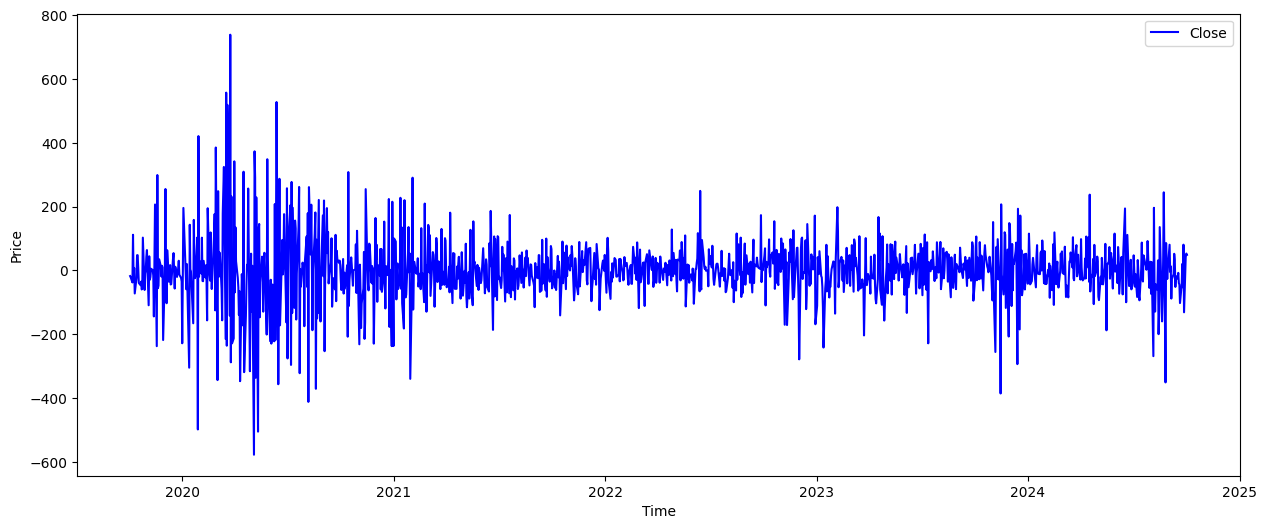

In [19]:
plot_series(idrx_diff, ['Close'])

Looks the data has removed the unit root, now we'll check the stationary using ADF again

In [20]:
check_stationary(idrx_diff, columns=idrx_diff.columns)

1). ADF For column Open:
ADF_statistic: -8.388546437445354
p-value: 2.401294780588394e-13
Number of lags used: 18
Critical Values:
1%: -3.4354451795550935
5%: -2.863790090661305
10%: -2.567967966012737

The series is stationary!

-------------------------------------------------
2). ADF For column High:
ADF_statistic: -9.667281409070814
p-value: 1.3049845179839434e-16
Number of lags used: 9
Critical Values:
1%: -3.4354096984769003
5%: -2.863774435037593
10%: -2.567959628657891

The series is stationary!
3). ADF For column Low:
ADF_statistic: -11.779276874806499
p-value: 1.0442450160049276e-21
Number of lags used: 9
Critical Values:
1%: -3.4354096984769003
5%: -2.863774435037593
10%: -2.567959628657891

The series is stationary!

-------------------------------------------------
4). ADF For column Close:
ADF_statistic: -8.038601593896805
p-value: 1.873312294733309e-12
Number of lags used: 18
Critical Values:
1%: -3.4354451795550935
5%: -2.863790090661305
10%: -2.567967966012737

The ser

## Checking ACF and PACF

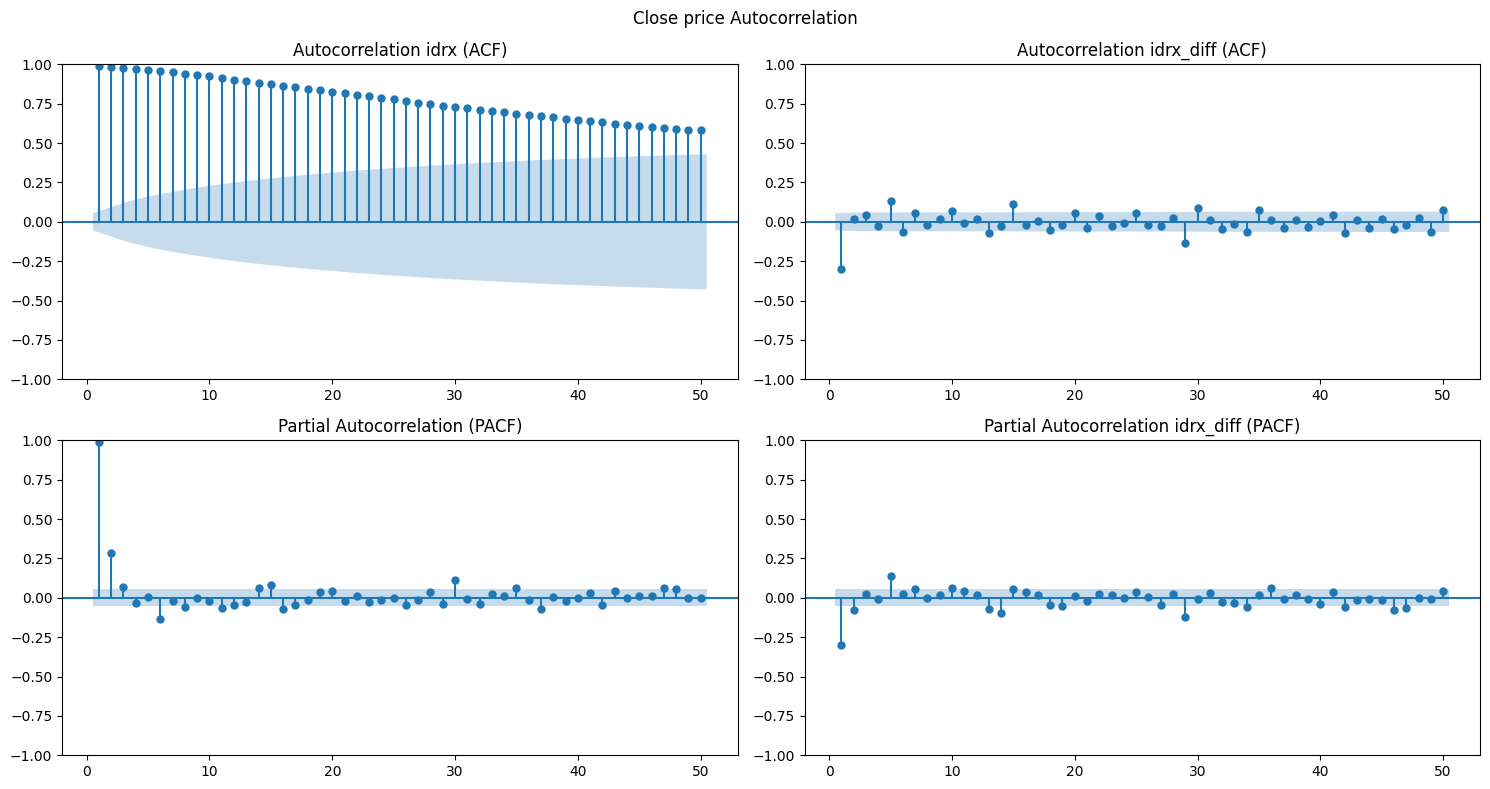

In [21]:
fig, ax = plt.subplots(figsize=(15, 8), ncols=2, nrows=2)
# Plot the ACF
fig.suptitle('Close price Autocorrelation')
plot_acf(idrx_df['Close'], lags=50, title="Autocorrelation idrx (ACF)", zero=False, ax=ax[0][0])
plot_acf(idrx_diff['Close'], lags=50, title="Autocorrelation idrx_diff (ACF)", zero=False, ax=ax[0][1])


# Plot the PACF
plot_pacf(idrx_df['Close'], lags=50, title="Partial Autocorrelation (PACF)", zero=False, ax=ax[1][0])
plot_pacf(idrx_diff['Close'], lags=50, title="Partial Autocorrelation idrx_diff (PACF)", zero=False, ax=ax[1][1])

plt.tight_layout()
plt.show()

**ACF Plot**: If there are significant spikes at certain lags, it indicates that the time series at those lags is correlated with the current values, which may help in deciding the window size. <br>
<br>
**PACF Plot**: Helps determine the number of autoregressive terms. If PACF drops sharply after a few lags, it means that those lags are the most significant for predicting future values.

## Split data

Here we're going to split the dataset into train and valid dataset. Where each will be differenced dataset (stationary) and original dataset (non-stationary), which both would be trained and compared their accuracy to receive a better model

In [22]:
split_time = int(len(idrx_df) * 0.2)
train_series = idrx_df[:-split_time]
valid_series = idrx_df[-split_time:]
train_series_diff = idrx_diff[:-split_time]
valid_series_diff = idrx_diff[-split_time:]

### train test series

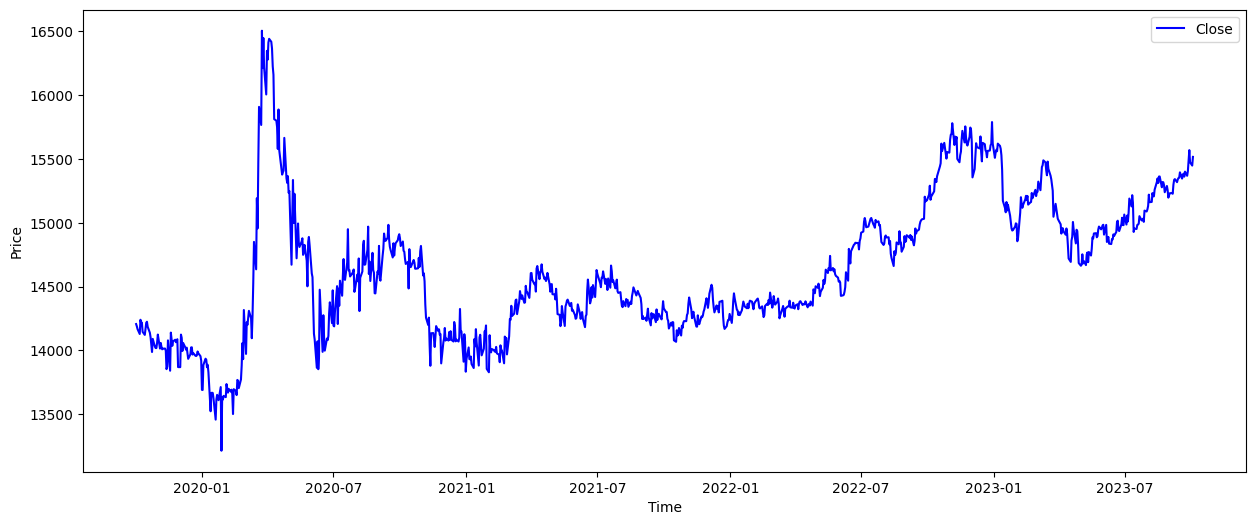

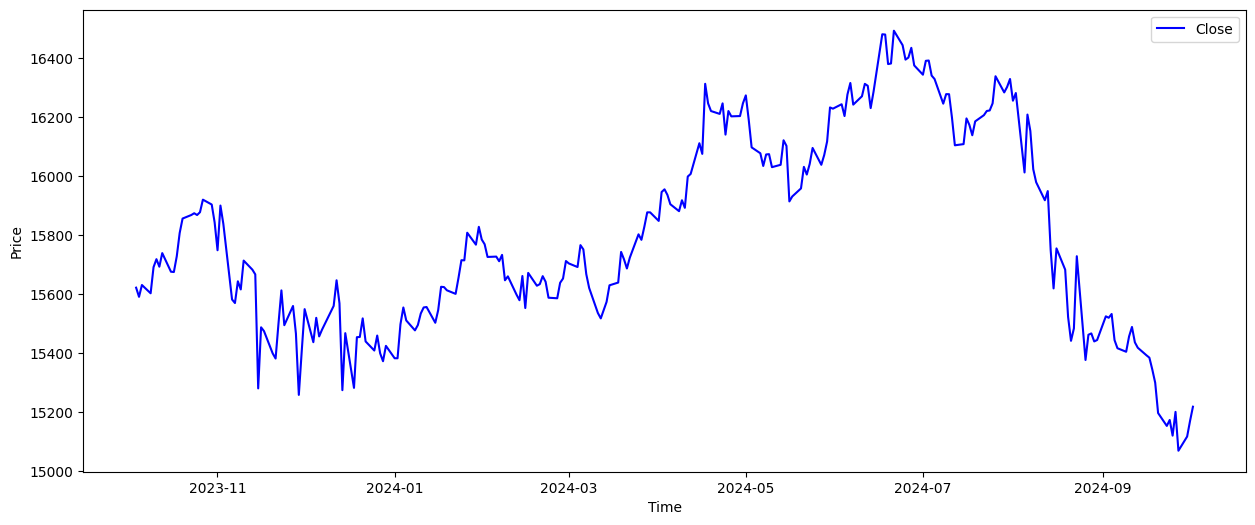

In [23]:
# plot train series
plot_series(train_series, ['Close'])
# plot validation series
plot_series(valid_series, ['Close'])

### train test series diff

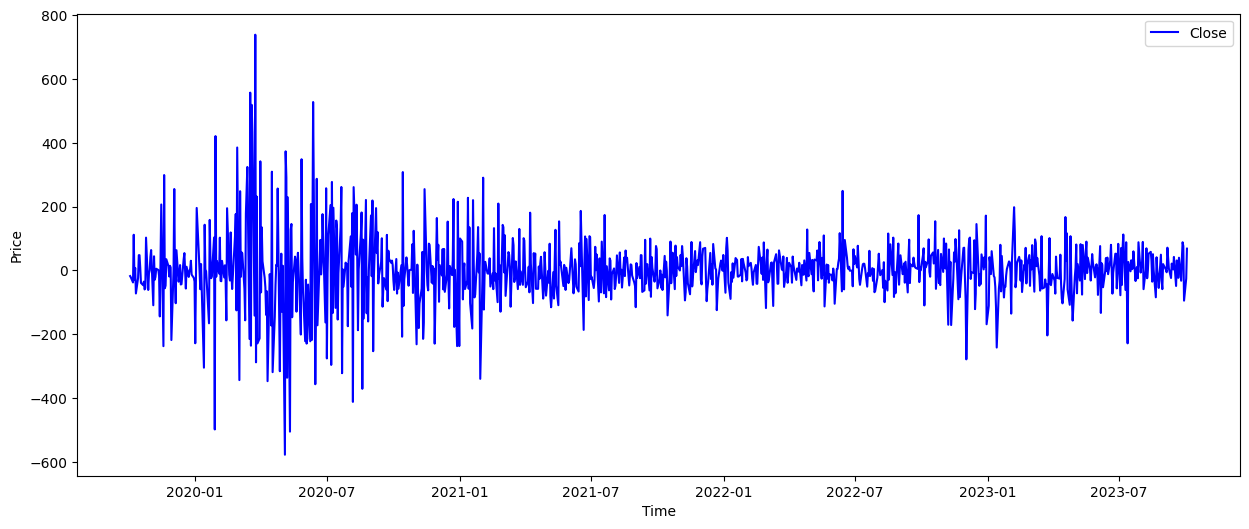

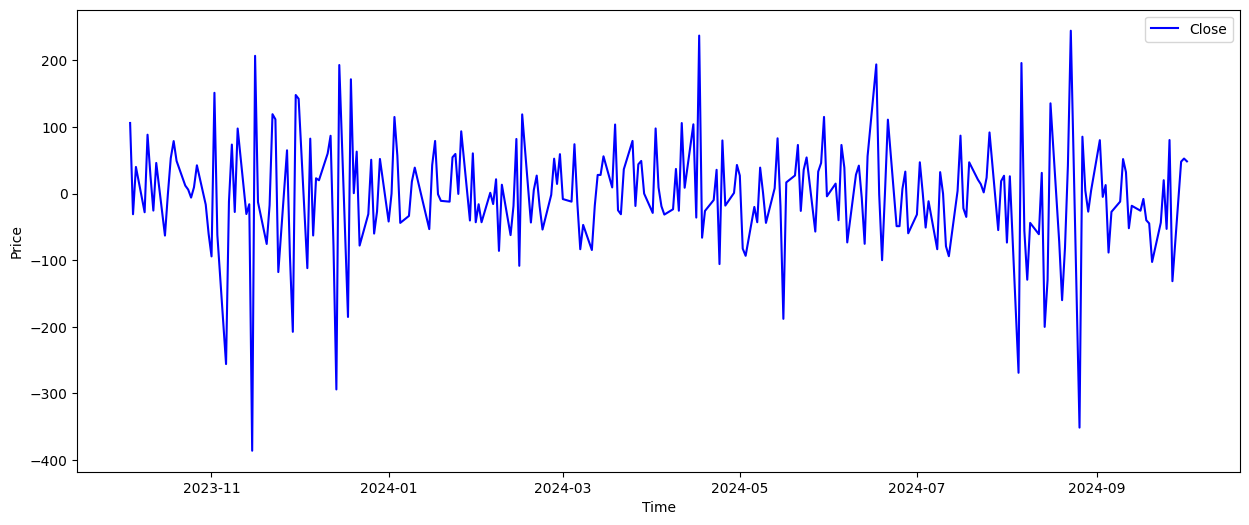

In [24]:
plot_series(train_series_diff, ['Close'])
plot_series(valid_series_diff, ['Close'])

# Windowing Data Series
•	For a Differenced Series (idrx_diff): Start with a window size of 1 or 2, since most of the correlation is explained within those lags.

•	For the Original Series (idrx): If you’re not differencing the series, you might consider a larger window size to account for the strong autocorrelation seen in the ACF (e.g., a window size between 10 to 20).

In [25]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  # create tf dataset
  dataset = tf.data.Dataset.from_tensor_slices(series)

  # windowed dataset as window size
  dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)

  # flat the window
  dataset = dataset.flat_map(lambda window : window.batch(window_size+1))

  # map the window to input and target value
  dataset = dataset.map(lambda window: (window[:-1], window[-1]))

  # shuffle the dataset
  dataest = dataset.shuffle(shuffle_buffer)

  # batching the dataset and prefetch 1 data point
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [159]:
BATCH_SIZE = 60
WINDOW_SIZE = 60 # will be explore more and fine tuned the value
WINDOW_SIZE_DIFF = 30 # will be explore more and fine tuned the value
SHUFFLE_BUFFER = len(train_series)

train_idrx = windowed_dataset(train_series['Close'], window_size=WINDOW_SIZE, batch_size=BATCH_SIZE, shuffle_buffer=SHUFFLE_BUFFER)
valid_idrx = windowed_dataset(valid_series['Close'], window_size=WINDOW_SIZE, batch_size=BATCH_SIZE, shuffle_buffer=SHUFFLE_BUFFER)

train_idrx_diff = windowed_dataset(train_series_diff['Close'], window_size=WINDOW_SIZE_DIFF, batch_size=BATCH_SIZE, shuffle_buffer=SHUFFLE_BUFFER)
valid_idrx_diff = windowed_dataset(valid_series_diff['Close'], window_size=WINDOW_SIZE_DIFF, batch_size=BATCH_SIZE, shuffle_buffer=SHUFFLE_BUFFER)

In [160]:
for j, data in enumerate(train_idrx.take(2)):
  # Look up the 5 first training datasetes from batch 1 and 2
  print(f'\n\033[1mBATCH: {j}\033[0m '.ljust(50, '-'))
  for i in range(5):
    print(f'\033[32mseries\033[0m: {data[0][i].numpy()}\n\033[31mtarget\033[0m: {data[1][i].numpy()}')


BATCH: 0 --------------------------------
series: [14206.         14188.         14166.         14128.
 14239.5        14210.         14217.5        14145.
 14121.         14168.5        14216.         14224.
 14184.5        14138.         14102.5        14042.5
 13987.         14089.5        14028.         14018.
 14018.         14060.         14123.5        14014.
 14058.         14028.5        14008.         14013.
 14014.0390625  13997.20019531 13852.74707031 13871.640625
 14078.         13840.30273438 14139.         14083.
 14035.27832031 14070.         14083.01171875 14063.74804688
 14078.         14087.12988281 13868.66015625 13868.34570312
 14123.27636719 14098.         13994.88476562 14058.
 14022.37988281 14004.60058594 14021.         13976.61328125
 13933.35644531 13968.52539062 14022.5        14024.
 13966.91992188 13978.15625    13957.58105469 13955.62695312]
target: 13961.0
series: [14188.         14166.         14128.         14239.5
 14210.         14217.5        14145

In [161]:
for j, data in enumerate(train_idrx_diff.take(2)):
  # Look up the 5 first training datasetes from batch 1 and 2
  print(f'\n\033[1mBATCH: {j}\033[0m '.ljust(50, '-'))
  for i in range(5):
    print(f'\033[32mseries\033[0m: {data[0][i].numpy()}\n\033[31mtarget\033[0m: {data[1][i].numpy()}')


BATCH: 0 --------------------------------
series: [ -18.          -22.          -38.          111.5         -29.5
    7.5         -72.5         -24.           47.5          47.5
    8.          -39.5         -46.5         -35.5         -60.
  -55.5         102.5         -61.5         -10.            0.
   42.           63.5        -109.5          44.          -29.5
  -20.5           5.            1.0390625   -16.83886719 -144.453125  ]
target: 18.8935546875
series: [ -22.          -38.          111.5         -29.5           7.5
  -72.5         -24.           47.5          47.5           8.
  -39.5         -46.5         -35.5         -60.          -55.5
  102.5         -61.5         -10.            0.           42.
   63.5        -109.5          44.          -29.5         -20.5
    5.            1.0390625   -16.83886719 -144.453125     18.89355469]
target: 206.359375
series: [ -38.          111.5         -29.5           7.5         -72.5
  -24.           47.5          47.5           8.

# Build the model

In [180]:
def build_model(window_size):
  model = tf.keras.Sequential()
  model.add(tf.keras.Input(shape=(window_size, 1)))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60, return_sequences=True)))
  model.add(tf.keras.layers.LSTM(60, return_sequences=True))
  model.add(tf.keras.layers.Conv1D(filters=60,
                                   kernel_size=5,
                                   activation='relu',
                                   strides=1,
                                   padding='valid'))
  model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
  model.add(tf.keras.layers.GlobalAveragePooling1D())
  model.add(tf.keras.layers.Dense(30, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation='relu'))
  model.add(tf.keras.layers.Dense(1))
  model.add(tf.keras.layers.Lambda(lambda x: x * 10000))

  return model

In [181]:
model_tune = build_model(window_size=WINDOW_SIZE)
model_diff_tune = build_model(window_size=WINDOW_SIZE_DIFF)

model_tune.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_10 (Bidirectional)     │ (None, 60, 120)             │          29,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 60, 60)              │          43,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 56, 60)              │          18,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 28, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_10          │ (None, 60)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_10 (Lambda)                   │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,411 (364.89 KB)

 Trainable params: 93,411 (364.89 KB)

 Non-trainable params: 0 (0.00 B)

In [182]:
model_diff_tune.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_11 (Bidirectional)     │ (None, 30, 120)             │          29,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 30, 60)              │          43,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 26, 60)              │          18,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 13, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_11          │ (None, 60)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_11 (Lambda)                   │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,411 (364.89 KB)

 Trainable params: 93,411 (364.89 KB)

 Non-trainable params: 0 (0.00 B)

## Tune the learning Rate

In [183]:
# Get initial weights
init_weights = model_tune.get_weights()
init_weights_diff = model_diff_tune.get_weights()

In [184]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch : 1e-8 * 10**(epoch/20)
    , verbose=1)

model_tune.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(momentum=0.9),
              metrics=['mae'])

model_diff_tune.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(momentum=0.9),
              metrics=['mae'])

In [185]:
history = model_tune.fit(train_idrx, epochs=100,
                    callbacks=[lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 1e-08.
Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 19348.6699 - mae: 19349.1699 - learning_rate: 1.0000e-08

Epoch 2: LearningRateScheduler setting learning rate to 1.1220184543019634e-08.
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 13364.2461 - mae: 13364.7461 - learning_rate: 1.1220e-08

Epoch 3: LearningRateScheduler setting learning rate to 1.2589254117941673e-08.
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 9928.4805 - mae: 9928.9805 - learning_rate: 1.2589e-08

Epoch 4: LearningRateScheduler setting learning rate to 1.4125375446227544e-08.
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 7224.1152 - mae: 7224.6152 - learning_rate: 1.4125e-08

Epoch 5: LearningRateScheduler setting learning rate to 1.5848931924611136e-08.
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 3431.3857 - mae: 3431.8857 - learning_rate: 1.5849e-08

Epoch 6: LearningRateScheduler s

In [186]:
history_diff = model_diff_tune.fit(train_idrx_diff, epochs=100,
                              callbacks=[lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 1e-08.
Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 675.2725 - mae: 675.7725 - learning_rate: 1.0000e-08

Epoch 2: LearningRateScheduler setting learning rate to 1.1220184543019634e-08.
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 295.7403 - mae: 296.2399 - learning_rate: 1.1220e-08

Epoch 3: LearningRateScheduler setting learning rate to 1.2589254117941673e-08.
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 282.3727 - mae: 282.8718 - learning_rate: 1.2589e-08

Epoch 4: LearningRateScheduler setting learning rate to 1.4125375446227544e-08.
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 179.6085 - mae: 180.1084 - learning_rate: 1.4125e-08

Epoch 5: LearningRateScheduler setting learning rate to 1.5848931924611136e-08.
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 200.6998 - mae: 201.1983 - learning_rate: 1.5849e-08

Epoch 6: LearningRateScheduler setting learnin

In [187]:

lrs = 1e-8 * (10 ** (np.arange(100)/20))

def plot_learning_rates(lrs, history, axis=None):
  fig, ax = plt.subplots(figsize=(15, 5))
  # Set the grid
  plt.grid(True)

  plt.semilogx(lrs, history.history['loss'])
  # Increase the tickmarks size
  plt.tick_params('both', length=10, width=1, which='both')
  # Set the plot boundaries
  plt.axis(axis)

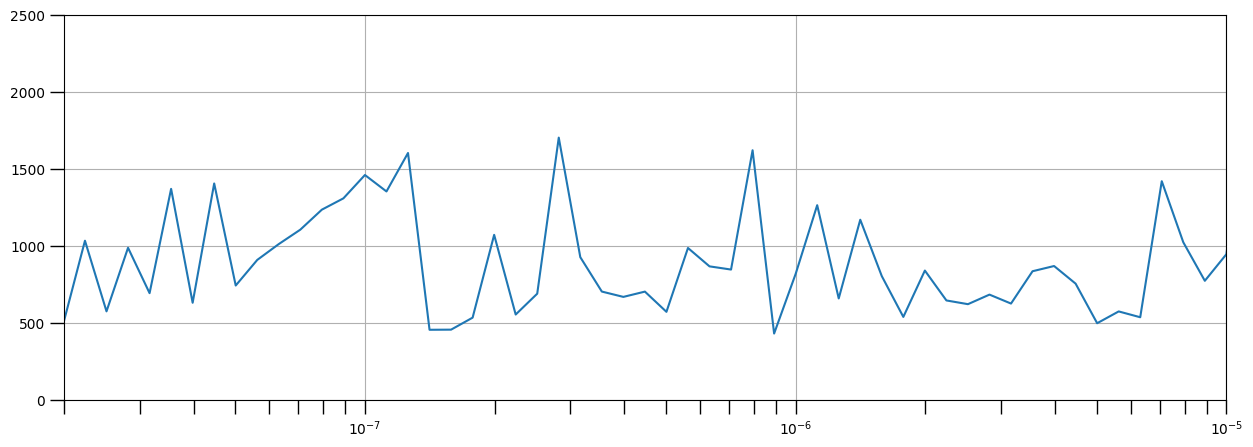

In [193]:
plot_learning_rates(lrs, history, axis=[2e-8, 1e-5, 0, 2500])

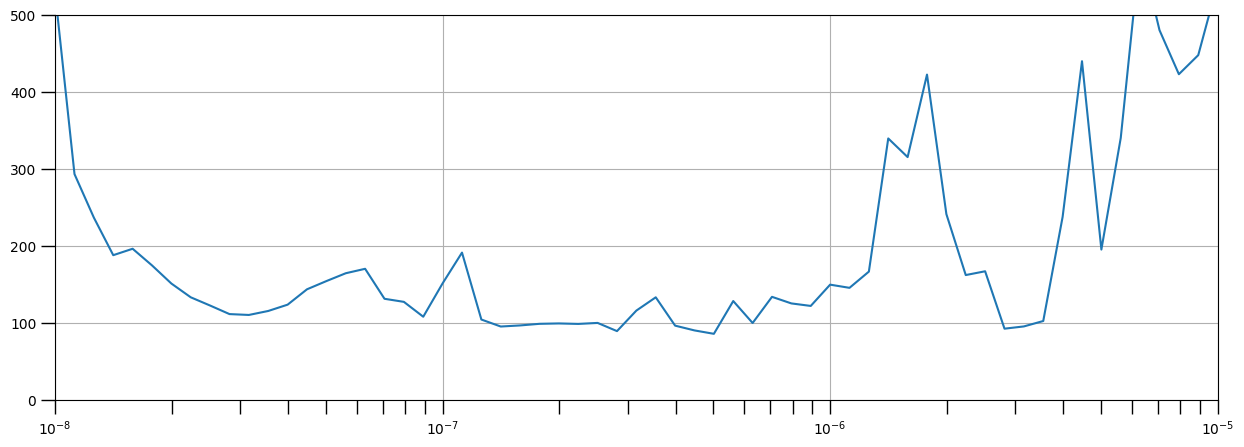

In [194]:
plot_learning_rates(lrs, history_diff, axis=[1e-8, 1e-5,0, 500])

In [ ]:
# clear the backend
tf.keras.backend.clear_session()

# reset the weights
model_tune.set_weights(init_weights)
model_diff_tune.set_weights(init_weights_diff)

# Train the model

In [195]:
model = build_model(window_size=WINDOW_SIZE)
model_diff = build_model(window_size=WINDOW_SIZE_DIFF)

learning_rate = 4e-7
learning_rate_diff = 2e-7

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(
                  momentum=0.9, learning_rate=learning_rate),
              metrics=['mae'])

model_diff.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(
                  momentum=0.9, learning_rate=learning_rate))

In [196]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_12 (Bidirectional)     │ (None, 60, 120)             │          29,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 60, 60)              │          43,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 56, 60)              │          18,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 28, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_12          │ (None, 60)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_12 (Lambda)                   │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,411 (364.89 KB)

 Trainable params: 93,411 (364.89 KB)

 Non-trainable params: 0 (0.00 B)

In [197]:
model_diff.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_13 (Bidirectional)     │ (None, 30, 120)             │          29,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 30, 60)              │          43,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 26, 60)              │          18,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 13, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_13          │ (None, 60)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_13 (Lambda)                   │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,411 (364.89 KB)

 Trainable params: 93,411 (364.89 KB)

 Non-trainable params: 0 (0.00 B)

In [198]:
history = model.fit(train_idrx,
                    epochs=250,
                    validation_data=valid_idrx,
                    batch_size=BATCH_SIZE)

Epoch 1/250
     16/Unknown 5s 76ms/step - loss: 11940.7334 - mae: 11941.2334

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 11599.7109 - mae: 11600.2109 - val_loss: 1297.8727 - val_mae: 1298.3727
Epoch 2/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 1947.2318 - mae: 1947.7317 - val_loss: 1102.7347 - val_mae: 1103.2347
Epoch 3/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 859.1157 - mae: 859.6157 - val_loss: 1484.4857 - val_mae: 1484.9857
Epoch 4/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 666.7777 - mae: 667.2777 - val_loss: 1337.7513 - val_mae: 1338.2513
Epoch 5/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 537.2255 - mae: 537.7252 - val_loss: 404.8814 - val_mae: 405.3814
Epoch 6/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 791.8861 - mae: 792.3860 - val_loss: 1040.8138 - val_mae: 1041.3138
Epoch 7/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1111.2305 - mae: 1111.7305 - val_loss: 308.0832 - val_mae: 308.5832
Epoch 8/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 781.3299 - mae: 781.8299 - val_loss: 516.3217 - va

In [199]:
histor_diff = model.fit(train_idrx_diff,
                    epochs=250,
                    validation_data=valid_idrx_diff,
                    batch_size=BATCH_SIZE)

Epoch 1/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 14288.8652 - mae: 14289.3652 - val_loss: 11519.8643 - val_mae: 11520.3643
Epoch 2/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 7909.6768 - mae: 7910.1768 - val_loss: 215.4321 - val_mae: 215.9321
Epoch 3/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 734.8354 - mae: 735.3347 - val_loss: 329.4934 - val_mae: 329.9934
Epoch 4/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 402.6357 - mae: 403.1357 - val_loss: 169.3435 - val_mae: 169.8422
Epoch 5/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 250.9415 - mae: 251.4415 - val_loss: 260.4888 - val_mae: 260.9888
Epoch 6/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 208.1041 - mae: 208.6034 - val_loss: 300.1622 - val_mae: 300.6622
Epoch 7/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 236.8519 - mae: 237.3519 - val_loss: 221.2589 - val_mae: 221.7589
Epoch 8/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 197.7828 - mae: 198.2825 - val_loss: 197.8607 - 

In [202]:
def plot_history(history):
  fig, ax = plt.subplots(figsize=(15, 5), ncols=2, nrows=1)
  print(history.history.keys())

  params = history.history.keys()
  epochs = range(len(history.history['loss']))


  # Iterate over axes objects in the grid
   # Access and iterate over individual axes in the grid
  for i, param in enumerate(['loss', 'mae']):
    ax[i].set_title(param)
    ax[i].plot(epochs, history.history[param], label=param)
    ax[i].plot(epochs, history.history[f'val_{param}'], label=f'val_{param}')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Loss')
    ax[i].grid(True)
    ax[i].legend()

  plt.show()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


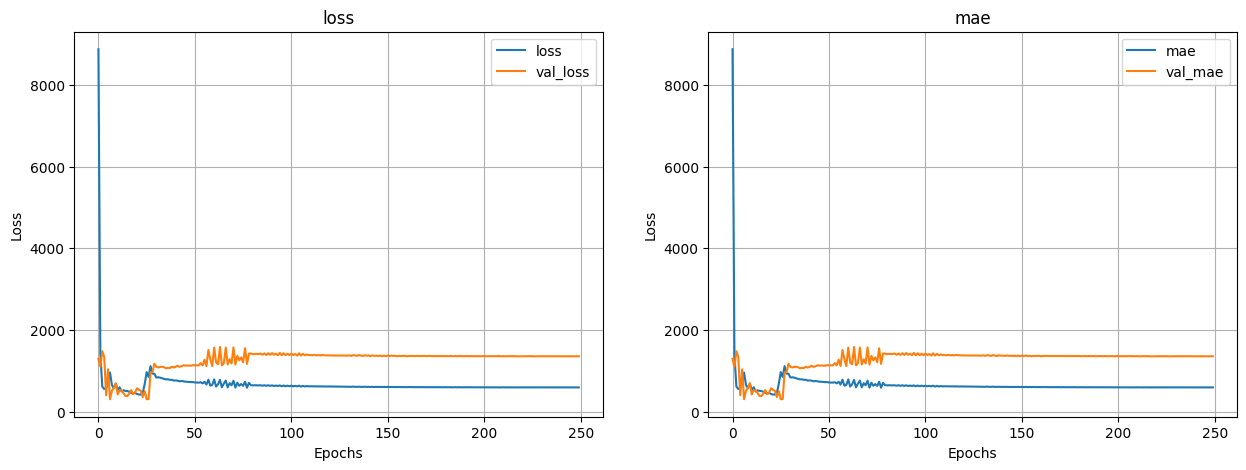

In [203]:
plot_history(history)

dict_keys(['loss', 'mae', 'learning_rate'])


KeyError: 'val_loss'

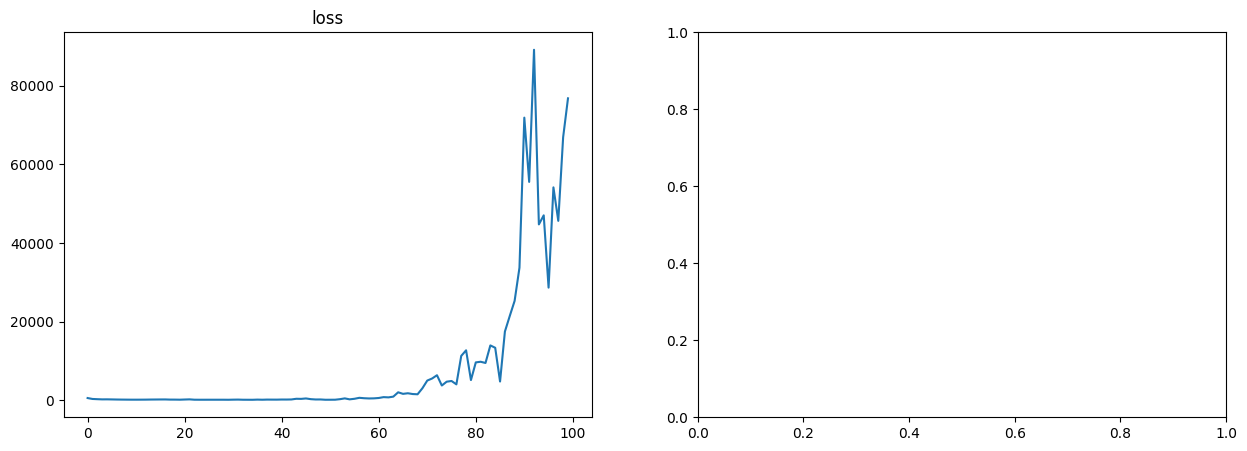

In [204]:
plot_history(history_diff)